<a href="https://colab.research.google.com/github/DaveWinc/Wincexercise/blob/main/Final_project_Dave_Koot__2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**#Which countries are making the biggest strides in decreasing CO2 output?**

You'll need to find the relative CO2 output for each country to be able to calculate this. But countries can have growing and shrinking populations too, so it's probably a good idea to take this into account as well.



In [2]:
#Connecting with google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
#importing modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
#Creating landcode filter

#Reading html for landcodes
tables = pd.read_html('https://www.iban.com/country-codes')

df_land = tables[0]

df_code = df_land.drop(['Alpha-2 code', 'Numeric'], axis=1)
df_code.rename(columns={'Alpha-3 code':'Code'}, inplace=True)

#creating list with landcodes
code_unique = df_code['Code'].unique()

In [ ]:
#Creating usable table

#reading csv
df_ = pd.read_csv('/content/drive/MyDrive/Final Winc project/files for largest predictor/Co2-emissions-per-capita.csv')

#filtering for landcodes
df_cap = df_[df_['Code'].isin(code_unique)]
#display(df_cap)

#Getting max Co2 values
idx = df_cap.groupby('Entity')['Annual CO₂ emissions (per capita)'].idxmax()
df_max_CO2= df_cap.loc[idx]
df_max_CO2.rename(columns={'Annual CO₂ emissions (per capita)':'CO2 max'},inplace=True)
#display(df_max_CO2)

#Getting 2022 CO2 values
df_lastyear = df_cap[df_cap['Year'] == 2022]
df_2022 = df_lastyear.copy()
df_2022.rename(columns={'Annual CO₂ emissions (per capita)':'CO2 emission 2022'},inplace=True)
#display(df_2022)

#merging df_max_CO2 and df_2022
df_merge = pd.merge(df_max_CO2, df_2022, on='Code')
df_merge.rename(columns={'Entity_x':'Country', 'Year_x':'Year of max', 'Year_y':'Year final'},inplace=True)
df_merge.drop('Entity_y', axis=1, inplace=True)

#Creating column with percentual increase
df_merge['max ratio'] = (df_merge['CO2 emission 2022']-df_merge['CO2 max'])/df_merge['CO2 max']

#sorting data
df_merge.sort_values('max ratio', ascending=True, inplace=True)
display(df_merge)


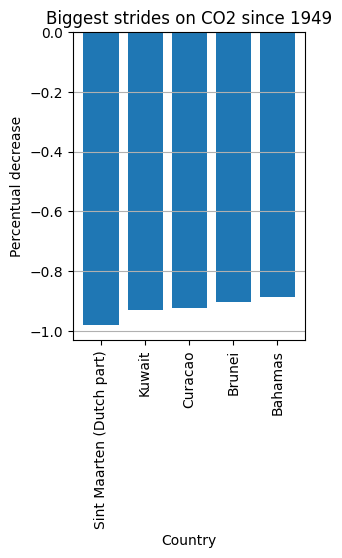

In [39]:
#Creating figure

#getting top 5 for figure
top_5_strides = df_merge.head(5)

#Creating figure
plt.figure(figsize=[3,4])

plt.bar(top_5_strides['Country'], top_5_strides['max ratio'])
plt.xlabel('Country')
plt.ylabel('Percentual decrease')
plt.title('Biggest strides on CO2 since 1949')
plt.grid(axis='y')
plt.tick_params(axis='x', rotation=90)

plt.show()

